<a href="https://colab.research.google.com/github/victor-hro/IA-na-saude/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=blue size=10>Regressão Linear</font>
***

Nesta aula, temos dois conjuntos de dados bem interessantes.

> Conjunto de dados 01: um determinado cliente, gestor de um hospital, está investindo cada vez mais em publicidade. Atualmente ele divulga seu negócio por meio de TVs, jornais e rádio. O cliente pediu para você realizar uma análise estatística para entender melhor a relação entre os gastos com publicidade e a quantidade de vendas que foram realizadas. Além disso, você deverá criar um modelo de regressão linear que prevê a quantidade de vendas quando fornecemos como entrada os valores que o hospital irá gastar as três fontes de divulgação.

> Conjunto de dados 02 : de forma fictícia, criamos um case para aplicar um modelo de regressão linear e solucionar o problema proposto. considere que nosso conjunto de dados é do hospital **HealthTech**. A equipe médica separou um dataset com algumas informações sobre os pacientes, sempre preservando para que dados importantes não sejam expostos. Ao analisar a planilha o gestor teve a percepção de que um modelo de previsão de custo iria auxiliar grandemente à equpe.


* [Link] Conjunto de dados 01:  https://book.huihoo.com/introduction-to-statistical-learning/Advertising.csv

* [Link] Conjunto de dados 02: https://www.kaggle.com/mirichoi0218/insurance

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.0. IMPORTANDO BIBLIOTECAS


In [2]:
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

import io

sns.set_style('darkgrid')

# 2.0. FUNÇÕES


## 2.1. Visualização

In [ ]:
def plot_correlation(df):
    sns.heatmap(df, cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) , annot= True);

# 3.0. Conjunto de Dados 01

In [3]:
DATA_DIR = '/content/drive/MyDrive/[Curso] - EAD na Saúde/08_Regressão Linear/data/Advertising.csv'

## 3.1  Análise Exploratória dos Dados

Esse conjunto de dados refere-se à quantidade de vendas (em milhares de unidades) de um produto específico em função dos orçamentos de publicidades (em milhares de dólares) para TVs, rádios e jornais. Com base nesses dados, devemos analisar a relação entre orçamento de publicidade e vendas para cada uma das variáveis e criar um modelo de regressão com base nas análises.

In [4]:
# criando o dataframe
df = pd.read_csv(DATA_DIR, index_col=0)

# visualizando o cabeçalho e printando algumas informações
print('Linhas:  ', df.shape[0])
print('Colunas: ', df.shape[1])

df.head()

Linhas:   200
Colunas:  4


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primeiramente, vamos relacionar todos as fontes de orçamento publicitário com as vendas.
Para isso, vamos utilizar dois métodos:
1.  gráfico de dispersão e distribuição de frequências;
2.  correlação de variáveis.

Utilizando a função `seaborn.scatterplot()`* do seaborn, podemos criar um gráfico de dispersão das vendas em função das fontes publicitárias;

Vamos utilizar a função `pandas.DataFrame.corr()`** para analisar a matriz de correlação do nosso dataframe.

*https://seaborn.pydata.org/generated/seaborn.scatterplot.html

**https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

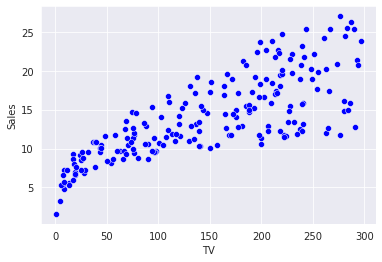

In [5]:
sns.scatterplot(
    data=df,
    x='TV',
    y='Sales',
    color='blue'
    );

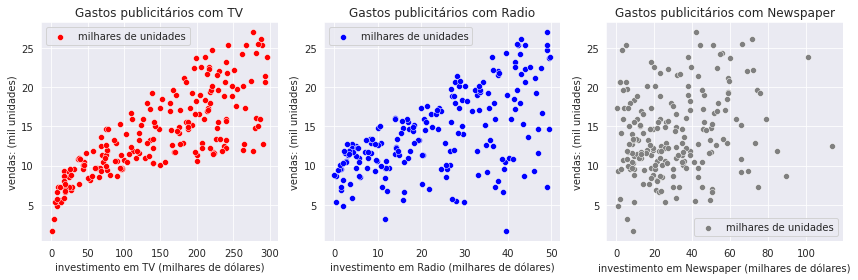

In [9]:
colunas = df.columns[:-1]
colors = ['red', 'blue', 'gray']
plt.figure(figsize=(12,4))

for i, col in enumerate(colunas):

    plt.subplot(1,3,i+1)
    sns.scatterplot(
    data=df,
    y='Sales',
    x=col,
    color= colors[i]
    );
    plt.title('Gastos publicitários com {}'.format(col))
    plt.legend(['milhares de unidades'])
    plt.xlabel(f'investimento em {col} (milhares de dólares)')
    plt.ylabel(f'vendas: (mil unidades)')
    plt.tight_layout()

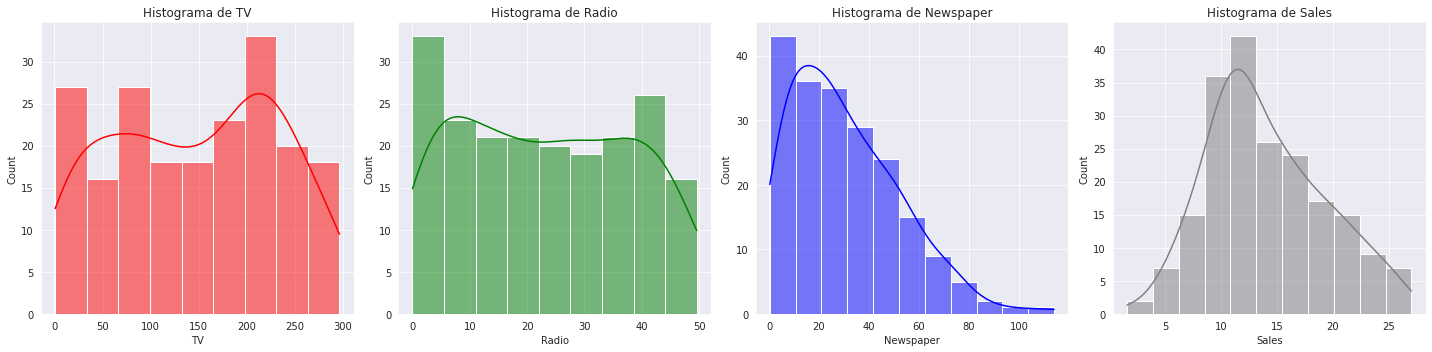

In [ ]:
colunas = df.columns
colors = ['red', 'green', 'blue', 'gray']
plt.figure(figsize=(20,5))

for i, col in enumerate(colunas):

    plt.subplot(1,4,i+1)
    sns.histplot(
    data=df,
    kde='hist',
    x=col,
    color= colors[i]
    );
    plt.title('Histograma de {}'.format(col))
    plt.tight_layout()

❗ A função lmplot permite entender melhor a relação entre as variáveis, ela traça uma linha de regressão sob os dados.

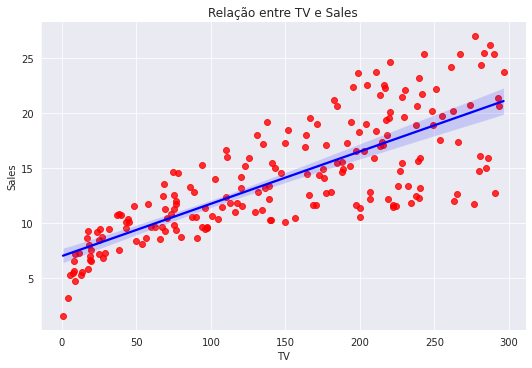

In [ ]:
sns.lmplot(
    data=df,
    x='TV',
    y='Sales',
    scatter_kws={'color': 'red'},
    line_kws={'color': 'blue'},
    aspect=1.5
)
plt.title('Relação entre TV e Sales');

✅  Exercício 1: Trace os gráficos de venda em função das outras fontes utilizando a função `sns.lmplot()` e responda a seguinte pergunta:

Qual fonte publicitária apresenta maior correlação com a quantidade de unidades vendidas?

In [ ]:
# SUBSTITUA ESSA CÉLULA PELO SEU CÓDIGO

Além de analisarmos os gráficos, vamos comprovar numericamente se sua resposta está correta. Para isso, vamos utilizar a função  `df.corr()` para visualizarmos a matriz de correlação do nosso conjunto de dados.

Essa função calcula o Coeficiente de correlação de Pearson ( $\rho$ ). Esse coeficiente mede o grau da correlação (e a direcção dessa correlação - se positiva ou negativa) entre duas variáveis.

$\rho =1$ : correlação perfeita positiva entre as duas variáveis.

$\rho =-1$ : correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui.

$\rho =0$ : as duas variáveis não dependem linearmente uma da outra.

In [ ]:
#EXPLICAR CORRELAÇÃO. COLAR A EXPLICAÇÃO DO R2 SCORE AQUI.
correlação = df.corr()

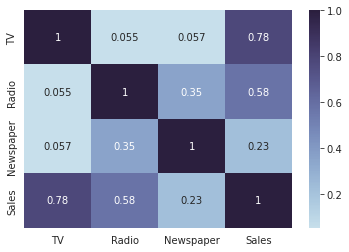

In [ ]:
# vamos utilizar a função plot_correlation (sessão 2.0 FUNÇÕES).
plot_correlation(correlação)

In [ ]:
# analisando a correlação das variáveis em relação a 'Sales'
correlação['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

Por meio de dados numéricos e gráficos pode-se perceber a relação entre uma variável e outra. Claramente, as divulgações por meio de TV tem maior correlação com as vendas - já para Newspaper apresenta o menor valor de correlação.

Nos dias atuais, como as pessoas passam menos tempo lendo jornais - até mesmo ouvindo rádio, podemos considerar que, dentre as fontes publicitárias disponíveis no dataset, TV pode ser uma boa fonte, garantindo um bom retorno para a empresa

## 3.2. Modelo de Regressão Linear

### 3.2.1. Preparando os dados

A partir de agora vamos apresentar a biblioteca **scikit-learn**. É uma biblioteca de código aberto feita para aprendizado de máquina. Ela inclui vários algoritmos de classificação, regressão e agrupamento e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

Tendo nossa matriz de características (Feature Matrix) e nossos rótulos, podemos criar conjuntos de dados para treinamento e teste. Para isso, iremos utilizar a função `train_test_split`* da biblioteca **sklearn** e dividir 80% para treinamento e 20% para teste.

*https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# PASSO 1: armazenando em X apenas a matriz de características, em Y o vetor de rótulos
X = df[['Radio','Newspaper','TV']]
y = df['Sales']

print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de y: {y.shape}')

Dimensões de X: (200, 3)
Dimensões de y: (200,)


In [ ]:
X.head(2)

,Radio,Newspaper,TV
1,37.8,69.2,230.1
2,39.3,45.1,44.5


In [ ]:
y.head(2)

1    22.1
2    10.4
Name: Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# dividindo em datasets de treinamento e teste
# test_size = 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Conjunto de treinamento
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# Conjunto de teste
print('Train MSE: {:.2f}' .format(mean_squared_error(y_train, y_train_predict)))
print('Train accuracy: {:.2f} %' .format(model.score(X_train, y_train)*100))

print('Test  MSE: {:.2f}' .format(mean_squared_error(y_test, y_test_predict)))
print('Test  accuracy: {:.2f} %' .format(model.score(X_test, y_test)*100))

Train MSE: 2.41
Train accuracy: 90.67 %
Test  MSE: 4.40
Test  accuracy: 86.01 %


# 3.0. Análise do Conjunto de Dados

##  3.1. Dataframe 02: Medical Ensurance

adicionar tutoriais de como utilizar o drive ou como fazer upload. Repositório web. Analisar wget do kaggle.

Primeiramente vamos importar nosso arquivo csv utilizando a célula abaixo.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (2).csv


Para ler qualquer arquivo csv, basta utilizar a função 
``` pd.read_csv('nome_do_arquivo.csv')```. Como estamos fazendo o upload para uma máquina do Google Colab, os arquivos virão no formato de um dicionário, contendo seu nome e os dados (em bytes). Para carregar o arquivo no google colab, podemos utilizar a célula abaixo

In [ ]:
uploaded

{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [ ]:
# criando o dataframe
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

# visualizando o cabeçalho e printando algumas informações
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[0])
# add bmi > categorical
df.head()

Linhas:  1338
Colunas:  1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# df.drop(df.loc[(df.smoker == 'no') & (df.charges>21000)].index, inplace=True)

Informações sobre cada coluna:

age: idade do beneficiário primário

sex: sexo do contratente do seguro (Homem/Mulher)

bmi: índice de massa corporal, idealmente 18,5 a 24,9

children: número de filhos cobertos pelo seguro saúde / Número de dependentes

smoker: fumante

region: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

charges: despesas médicas individuais cobradas pelo seguro saúde

Primeiramente, utilizando `describe` podemos obter informações importantes de cada coluna, como média e desvio padrão.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Sabemos que em aplicações reais, as planilhas estão submetidas a erros, o que pode ocasionar futuros problemas ao avaliar corretamente os dados. Na aula de hoje iremos demonstrar dois tipos de erro que ocorrem com maior frequência:


1.   NaN (Not a Number): é um valor ou símbolo utilizado para indicar valores indefinidos ou não compreensíveis no conjunto de dados.
2.   Arquivos duplicados: algumas linhas podem conter valores duplicados, sendo indesejável quando trabalhamos com dados.



In [ ]:
# percebe-se que ao aplicar 'df.isna()' podemos ter um dataframe contendo variaveis do tipo bool,
# Caso exista algum NaN, o valor é retornado como True.
# Sabendo que em python True=1 e False=0, uma das maneiras é somar todo o conjunto.
# Após a soma, o resultado esperado é 0, o que indica que não há arquivos NaN presentes no dataframe.
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


Exercício 01: agora é com você. Some todas as colunas para avaliar se realmente existe algum NaN ou duplicata.

Arquivos NaN:

In [ ]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.isna().sum()
# Apague o comentário e e comece aqui:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicatas:

In [ ]:
# Faça seu código a partir dessa linha. O resultado final deverá ser identico a resposta apresentada abaixo.
df.duplicated().sum()
# Apague o comentário e e comece aqui:

1

Muito bem! Se você chegou até aqui, percebeu que há um arquivo duplicado e nenhum NaN presente no conjunto. A partir de agora iremos lhe mostrar como limpar o dataset e corrigir essa falha.

In [ ]:
# analisando qual arquivo foi duplicado
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Antes de eliminar o arquivo duplicado do conjunto de dados, devemos ter uma noção do tamanho do dataframe anterior e posterior à eliminação. Falar sobre overfitting.

In [ ]:
df.shape

(1285, 7)

Sabendo que temos 1338 linhas e 7 colunas, pode-se aplicar o comando df.drop_duplicates()* para eliminar todos os arquivos duplicados.
Por meio da documentação do pandas pode-se ter uma melhor noção sobre os parâmetos passados à esta função. Neste caso 2 foram utilizados:


1.   inplace: utilizando True, posso remover as linhas desejadas diretamente no próprio dataframe.
2.   ignore_index= utilizando True, os valores de índices são resetados. Ao remover linhas, os índices permanecem os mesmos, para este caso o correto é refazer a contagem.



* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [ ]:
# ao utilizar inplace=True
df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
# checando o shape
df.shape
# REMOVA ESSA LINHA DE CÓDIGO E ANALISE SE O SHAPE ESTÁ COM O VALOR ADEQUADO.

(1284, 7)


## 3.1. Análises estatísticas e visualização de dados

Após limpar algumas informações indesejadas no conjunto de dados, chegamos ao momento de analisar e visualizar as informações presentes no arquivo. Para essa tarefa, você pode utilizar as funções criadas no início deste notebook. Sinta-se a vontade para alterar as funções ou desenvolver recursos de visualização com suas próprias estratégias.

Caso queria baixar alguma imagem, criamos uma função prontinha pra você. Basta utilizar a função `download_file(nome_do_arquivo)`. A função está comentada na célula abaixo, você poderá descomenta-la e baixar a imagem desejada. Sempre que quiser baixar alguma outra imagem, basta repetir o procedimento.

Referência: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### Distribuição de frequências

podemos classificar nosso conjunto de dados em dois tipos de variáveis: 
* qualitativas: sex, smoker, region
* quantitativas: age, bmi, children, charges

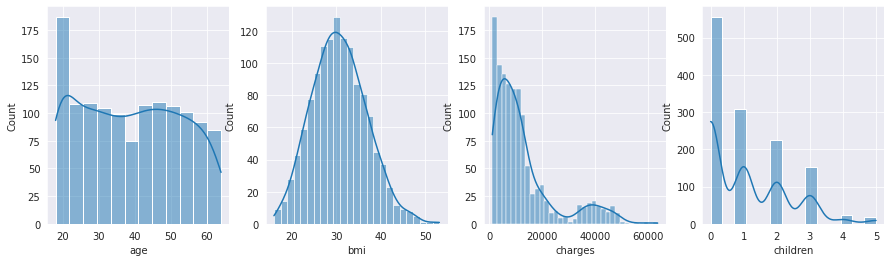

In [ ]:
# analisando histogramas de variáveis quantitativas
columns = ['age', 'bmi', 'charges', 'children']
plt.figure(figsize=(15,4))
for i, col in enumerate(columns):
    plt.subplot(1, len(columns), i+1)
    sns.histplot(df,x=col,kde=True);

Após visualizar, surge as seguintes hipóteses:
* age: há uma grande quantidade de sujeitos com 20 anos e uma quantidade menor de sujeitos com 40 anos;
* bmi: o valor de bmi pode tender a uma média aproximada de 30;
* charges: a frequência tende a decrescer conforme o aumento do valor;
* children: a frequência tende a decrescer conforme o aumento do número de crianças.

Vamos analisar o gráfico de barras contendo a quantidade de sujeitos por idade.

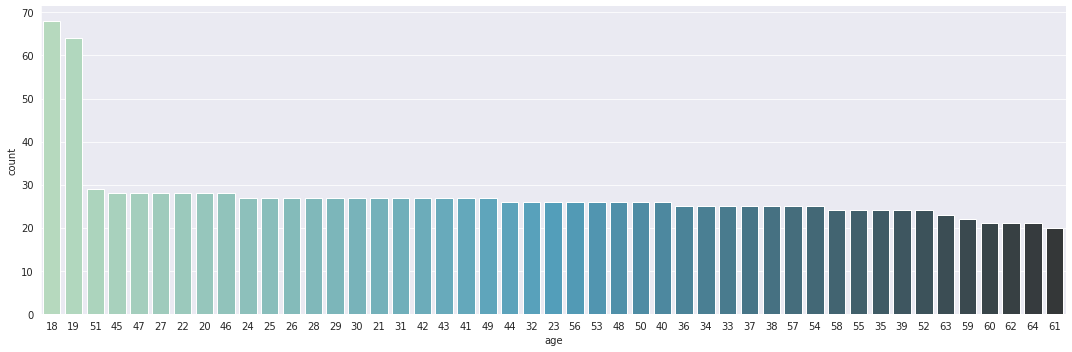

In [ ]:
sns.catplot(
        data = df,
        x = 'age',
        kind = "count",
        aspect = 3,
        order= df.age.value_counts().index,
        palette='GnBu_d',
        );

**Escreva sua conclusão aqui:**

In [ ]:
# Conclusão:

Analisando o valor médio da coluna bmi

In [ ]:
media_bmi = df.bmi.mean()
print('média: {:.2f}'.format(media_bmi))

média: 30.68


<Figure size 1080x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

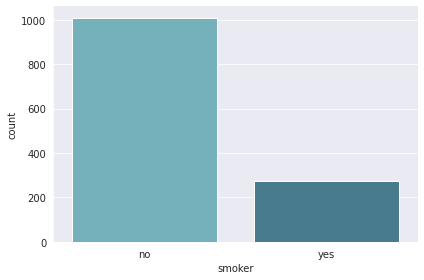

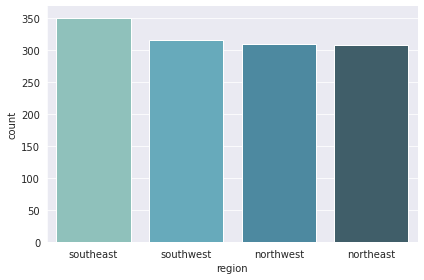

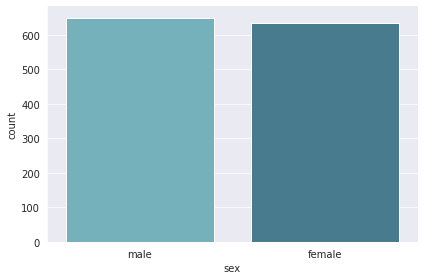

In [ ]:
# analisando histogramas de variáveis categóricas

columns = ['smoker', 'region', 'sex']
plt.figure(figsize=(15,4))
for i, col in enumerate(columns):
    plt.figure(i)
    sns.catplot(
        data = df,
        x = col,
        kind = "count",
        height = 4,
        aspect = 1.5,
        order= df[col].value_counts().index,
        palette='GnBu_d'
        )
    plt.tight_layout();

### 3.1.1. Correlação e gráfico de dispersão

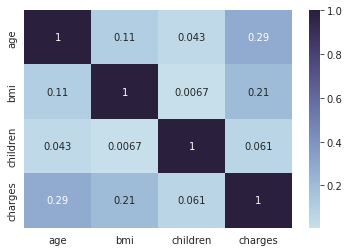

In [ ]:
# correlation plot

# COMO SALVAR O GRAFICO: PILLOW

corr = df.corr()
ax = sns.heatmap(corr,  cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) , annot= True);

# BAIXE SUA IMAGEM DESCOMENTANDO A CÉLULA ABAIXO
# download_file('correlação')

Podemos notar que **charges** está mais correlacionado com idade e com bmi. Já **children** apresenta apenas 6% de correlação com charges.

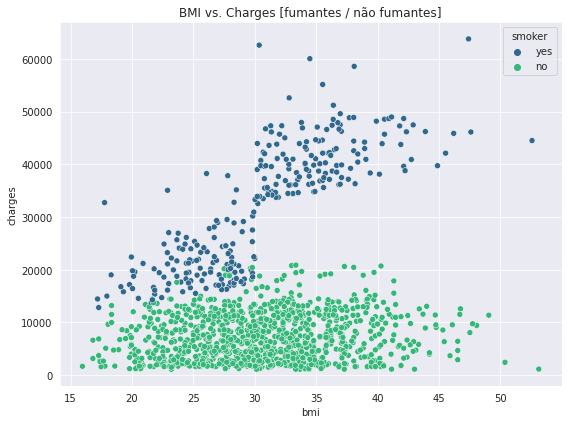

In [ ]:
# analisando o gráfico de dispersão para pacientes fumantes e não fumantes, relacionados com os valores de bmi e charges.

# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='bmi',
    y='charges',
    palette='viridis',
    hue='smoker'
    );

plt.title('BMI vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

Pode-se perceber que o valor de charges é maior para pacientes com bmi acima de 30, principalmente se forem fumantes.

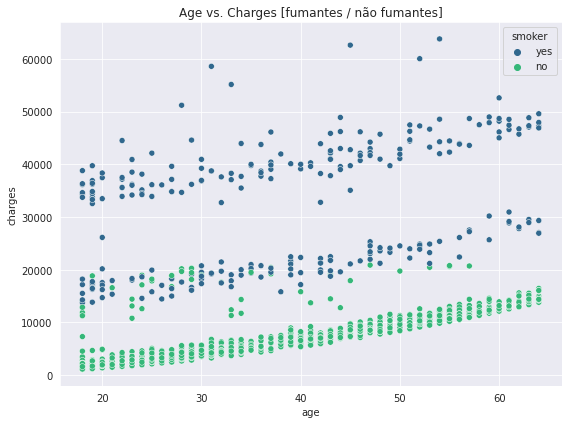

In [ ]:
# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='age',
    y='charges',
    palette='viridis',
    hue='smoker'
    );

plt.title('Age vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

Pode-se notar que o valor de charges tende a crescer conforme a idade, porém o valor fica ainda maior caso haja pacientes fumantes. 



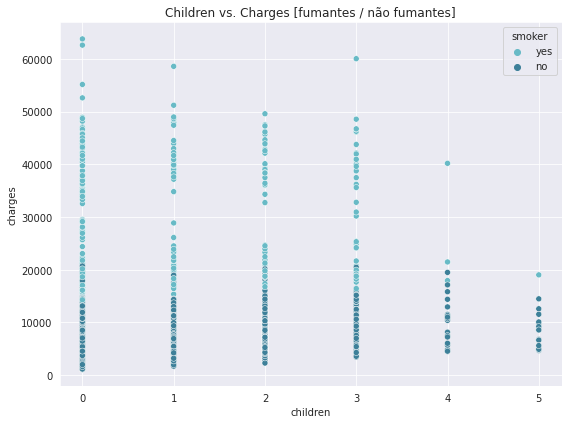

In [ ]:
# dimensões da figura
plt.figure(figsize=(8,6))

# gráfico de dispersão
sns.scatterplot(
    data=df,
    x='children',
    y='charges',
    palette='GnBu_d',
    hue='smoker'
    );

plt.title('Children vs. Charges [fumantes / não fumantes]')
plt.tight_layout()

Faça você mesmo: analise o gráfico que relaciona 'children vs charges' em relação a fumantes e não fumantes. Logo após, retire o hue = 'smoker' e analise o gráfico apenas 'children vs charges' e tire suas próprias conclusões. Responda as seguintes perguntas:



1.   O número de crianças interfere no valor de charges?
2.   Por quê para um maior número de crianças o valor de charges é menor?

In [ ]:
# Conclusões:

### Boxplot

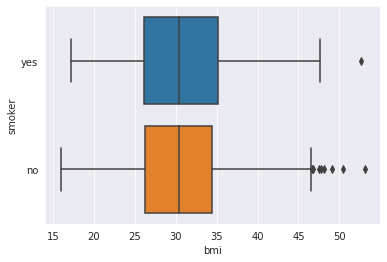

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='bmi',
    y='smoker',
    orient='h'
    );

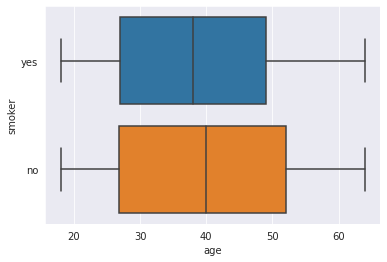

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='age',
    y='smoker',
    orient='h'
    );

Relação entre a idade e os pacientes fumantes e não fumantes: 
* a mediana é aproximada;
* podemos perceber que a maior parte dos pacientes fumantes está com uma distribuição de idade aproximadamente acima de 25 anos e abaixo de 50 anos.

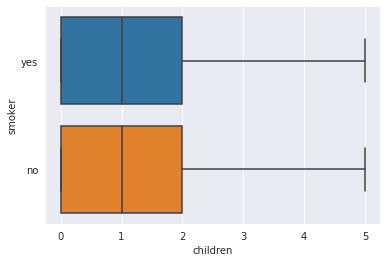

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='children',
    y='smoker',
    orient='h'
    );

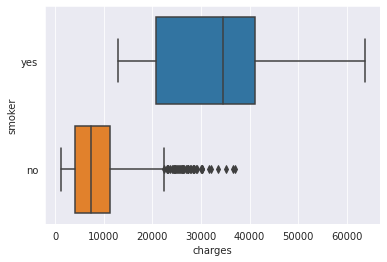

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='charges',
    y='smoker',
    orient='h'
    );

In [ ]:
# fumar somente não é um fator isolado, pois existem outras doenças. De acordo com os dados, podemos visualizar o aumento do custo de acordo com ...
# se o cara tem uma doença mais grave, ele não pode fumar - câncer, leucêmia (informar isso na boxplot)

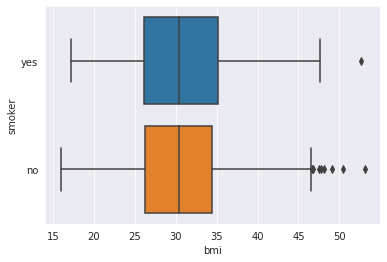

In [ ]:
# gráfico de dispersão
sns.boxplot(
    data=df,
    x='bmi',
    y='smoker',
    orient='h'
    );

#4.0. Modelo de Regressão Linear

## 4.1. Preparando os dados

Sabemos que modelos de regressão linear trabalham com dados numéricos e podemos perceber que algumas colunas não apresentam esses tipos de dados. Para adicionar entradas e saídas de um modelo de regressão, o ideal é converte-los para um formato adequado. As colunas 'sex', 'smoker' e 'region' são colunas com dados categóricos e precisam de uma conversão. Há várias formas de conversão, na aula de hoje iremos utilizar o comando `pd.get_dummies` *. Este comando irá converter os dados categoricos em colunas de 0s e 1s.

*https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html


In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convertendo as colunas categóricas para arrays de valores inteiros.
df.sex = le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)
df.region = le.fit_transform(df.region)

In [ ]:
print(f'Quantidade de rótulos para a coluna sex: {df.sex.nunique()}')
print(f'Quantidade de rótulos para a coluna smoker: {df.smoker.nunique()}')
print(f'Quantidade de rótulos para a coluna region: {df.region.nunique()}')

df.head()

Quantidade de rótulos para a coluna sex: 2
Quantidade de rótulos para a coluna smoker: 2
Quantidade de rótulos para a coluna region: 4


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620
3,32,1,28.88,0,0,1,3866.8552
4,31,0,25.74,0,0,2,3756.6216


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1284 non-null   int64  
 1   sex       1284 non-null   int64  
 2   bmi       1284 non-null   float64
 3   children  1284 non-null   int64  
 4   smoker    1284 non-null   int64  
 5   region    1284 non-null   int64  
 6   charges   1284 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 70.3 KB


In [ ]:
# escolhendo todas as features, exceto charges, que é nosso target
X = df.drop(columns=['charges'], axis=1)

# analisando alguns valores de X
X.shape

(1284, 6)

In [ ]:
y = df['charges']

# analisando alguns valores de y
y.shape

(1284,)

Agora que já temos nossos valores de X e y bem definidos, poderemos dividir em conjunto de dados para treinamento, validação e teste. Para isso, iremos utilizar a função `train_test_split`* da biblioteca **sklearn**. Para isso, vamos utilizar 80% para treinamento e 20% para teste.

*https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(1027, 6)
(1027,)

(257, 6)
(257,)


## 4.2. Treinando o modelo

Para importar um modelo de regressão linear, vamos utilizar a biblioteca **sklearn***. 

A função `fit` é responsável por treinar nosso modelo de regressão linear. É nesta função onde passamos nosso conjunto de treinamento como parâmetro.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# instanciando a função
model = LinearRegression()

# treinando
model.fit(X_train, y_train)

LinearRegression()

Agora que o modelo foi treinado é hora de avaliar seu desempenho. Para isso vamos utilizar o conjunto de validação. Considerando que o modelo foi treinado sob o conjunto de treinamento, o conjunto de validação seria algo novo para ele, como um caso real de um paciente que cadastrou no sistema e submeteram o modelo à uma inferência nos dados desse paciente.

vamos avaliar o coeficiênte de determinação da predição, também chamado de R2 score*. Quanto mais próximo de 1, melhor o desempenho do modelo.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [ ]:
# from sklearn.metrics import mean_squared_error

score_treinamento = model.score(X_train, y_train)
score_teste = model.score(X_test, y_test)
print(
    f'Score do conjunto de treinamento: {score_treinamento}')
print(
    f'Score do conjunto de teste: {score_teste}')

Score do conjunto de treinamento: 0.8204680386395946
Score do conjunto de teste: 0.8447972172677088


In [ ]:
# add bmi e partir daqui é com o aluno
# gerar o resultado

Pode-se notar que para um simples modelo de regressão linear, o score foi de 75% para o conjunto de teste. Como exercício você pode escolher retirar algumas features do conjunto de treinamento e avaliar o desempenho final do modelo.

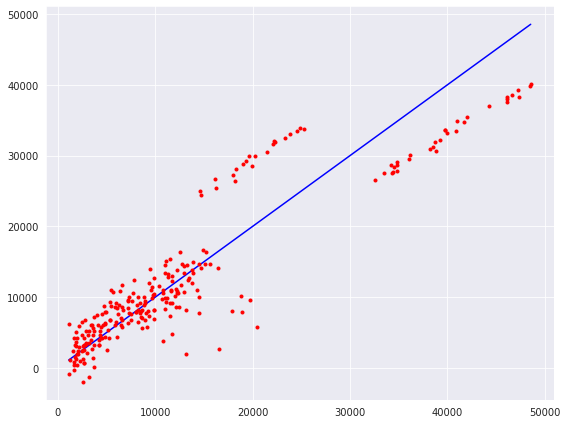

In [ ]:
def plot_regression(y_true, y_pred):
    
    y_true = y_true.to_numpy()
    idx = y_true.argsort()

    plt.figure(figsize=(8,6))
    plt.plot(y_true[idx], y_true[idx], 'b-')
    plt.plot(y_true, y_pred, 'r.')

    plt.xaxis= 'y_true'
    plt.yaxis= 'y_pred'
    plt.title= 'Erro residual'

    plt.tight_layout()

pred_test = model.predict(X_test)
plot_regression(y_test, pred_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


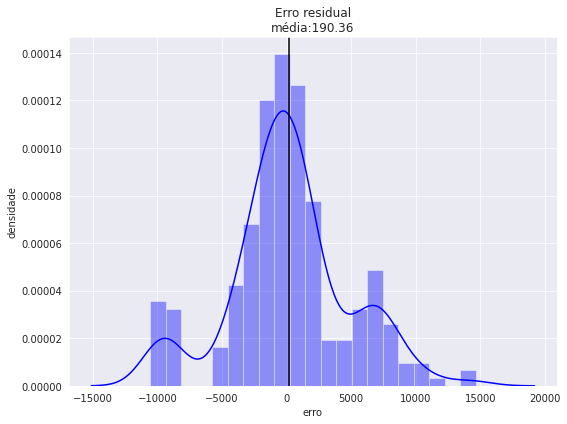

In [ ]:
# Erro residual
plt.figure(figsize=(8,6))

ax = sns.distplot((y_test- pred_test), color='b')

ax.set_xlabel('erro')
ax.set_ylabel('densidade')
ax.set_title('Erro residual\nmédia:{:.2f}'.format(np.mean((y_test- pred_test))))

plt.axvline(np.mean((y_test- pred_test)), color='black')
plt.set_style = 'dashed'
plt.set_legend = 'média'

plt.tight_layout();